In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data=pd.read_csv("train.winequality-white.csv",sep=";")
test_data=pd.read_csv("test.winequality-white.csv",sep=";")

In [3]:
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
test_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6
1,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6
3,6.4,0.25,0.57,1.0,0.062,21.0,122.0,0.99238,3.00,0.40,9.5,5
4,6.1,0.25,0.48,15.8,0.052,25.0,94.0,0.99782,3.07,0.45,9.2,6


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 12 columns):
fixed acidity           3998 non-null float64
volatile acidity        3998 non-null float64
citric acid             3998 non-null float64
residual sugar          3998 non-null float64
chlorides               3998 non-null float64
free sulfur dioxide     3998 non-null float64
total sulfur dioxide    3998 non-null float64
density                 3998 non-null float64
pH                      3998 non-null float64
sulphates               3998 non-null float64
alcohol                 3998 non-null float64
quality                 3998 non-null int64
dtypes: float64(11), int64(1)
memory usage: 374.9 KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
fixed acidity           900 non-null float64
volatile acidity        900 non-null float64
citric acid             900 non-null float64
residual sugar          900 non-null float64
chlorides               900 non-null float64
free sulfur dioxide     900 non-null float64
total sulfur dioxide    900 non-null float64
density                 900 non-null float64
pH                      900 non-null float64
sulphates               900 non-null float64
alcohol                 900 non-null float64
quality                 900 non-null int64
dtypes: float64(11), int64(1)
memory usage: 84.5 KB


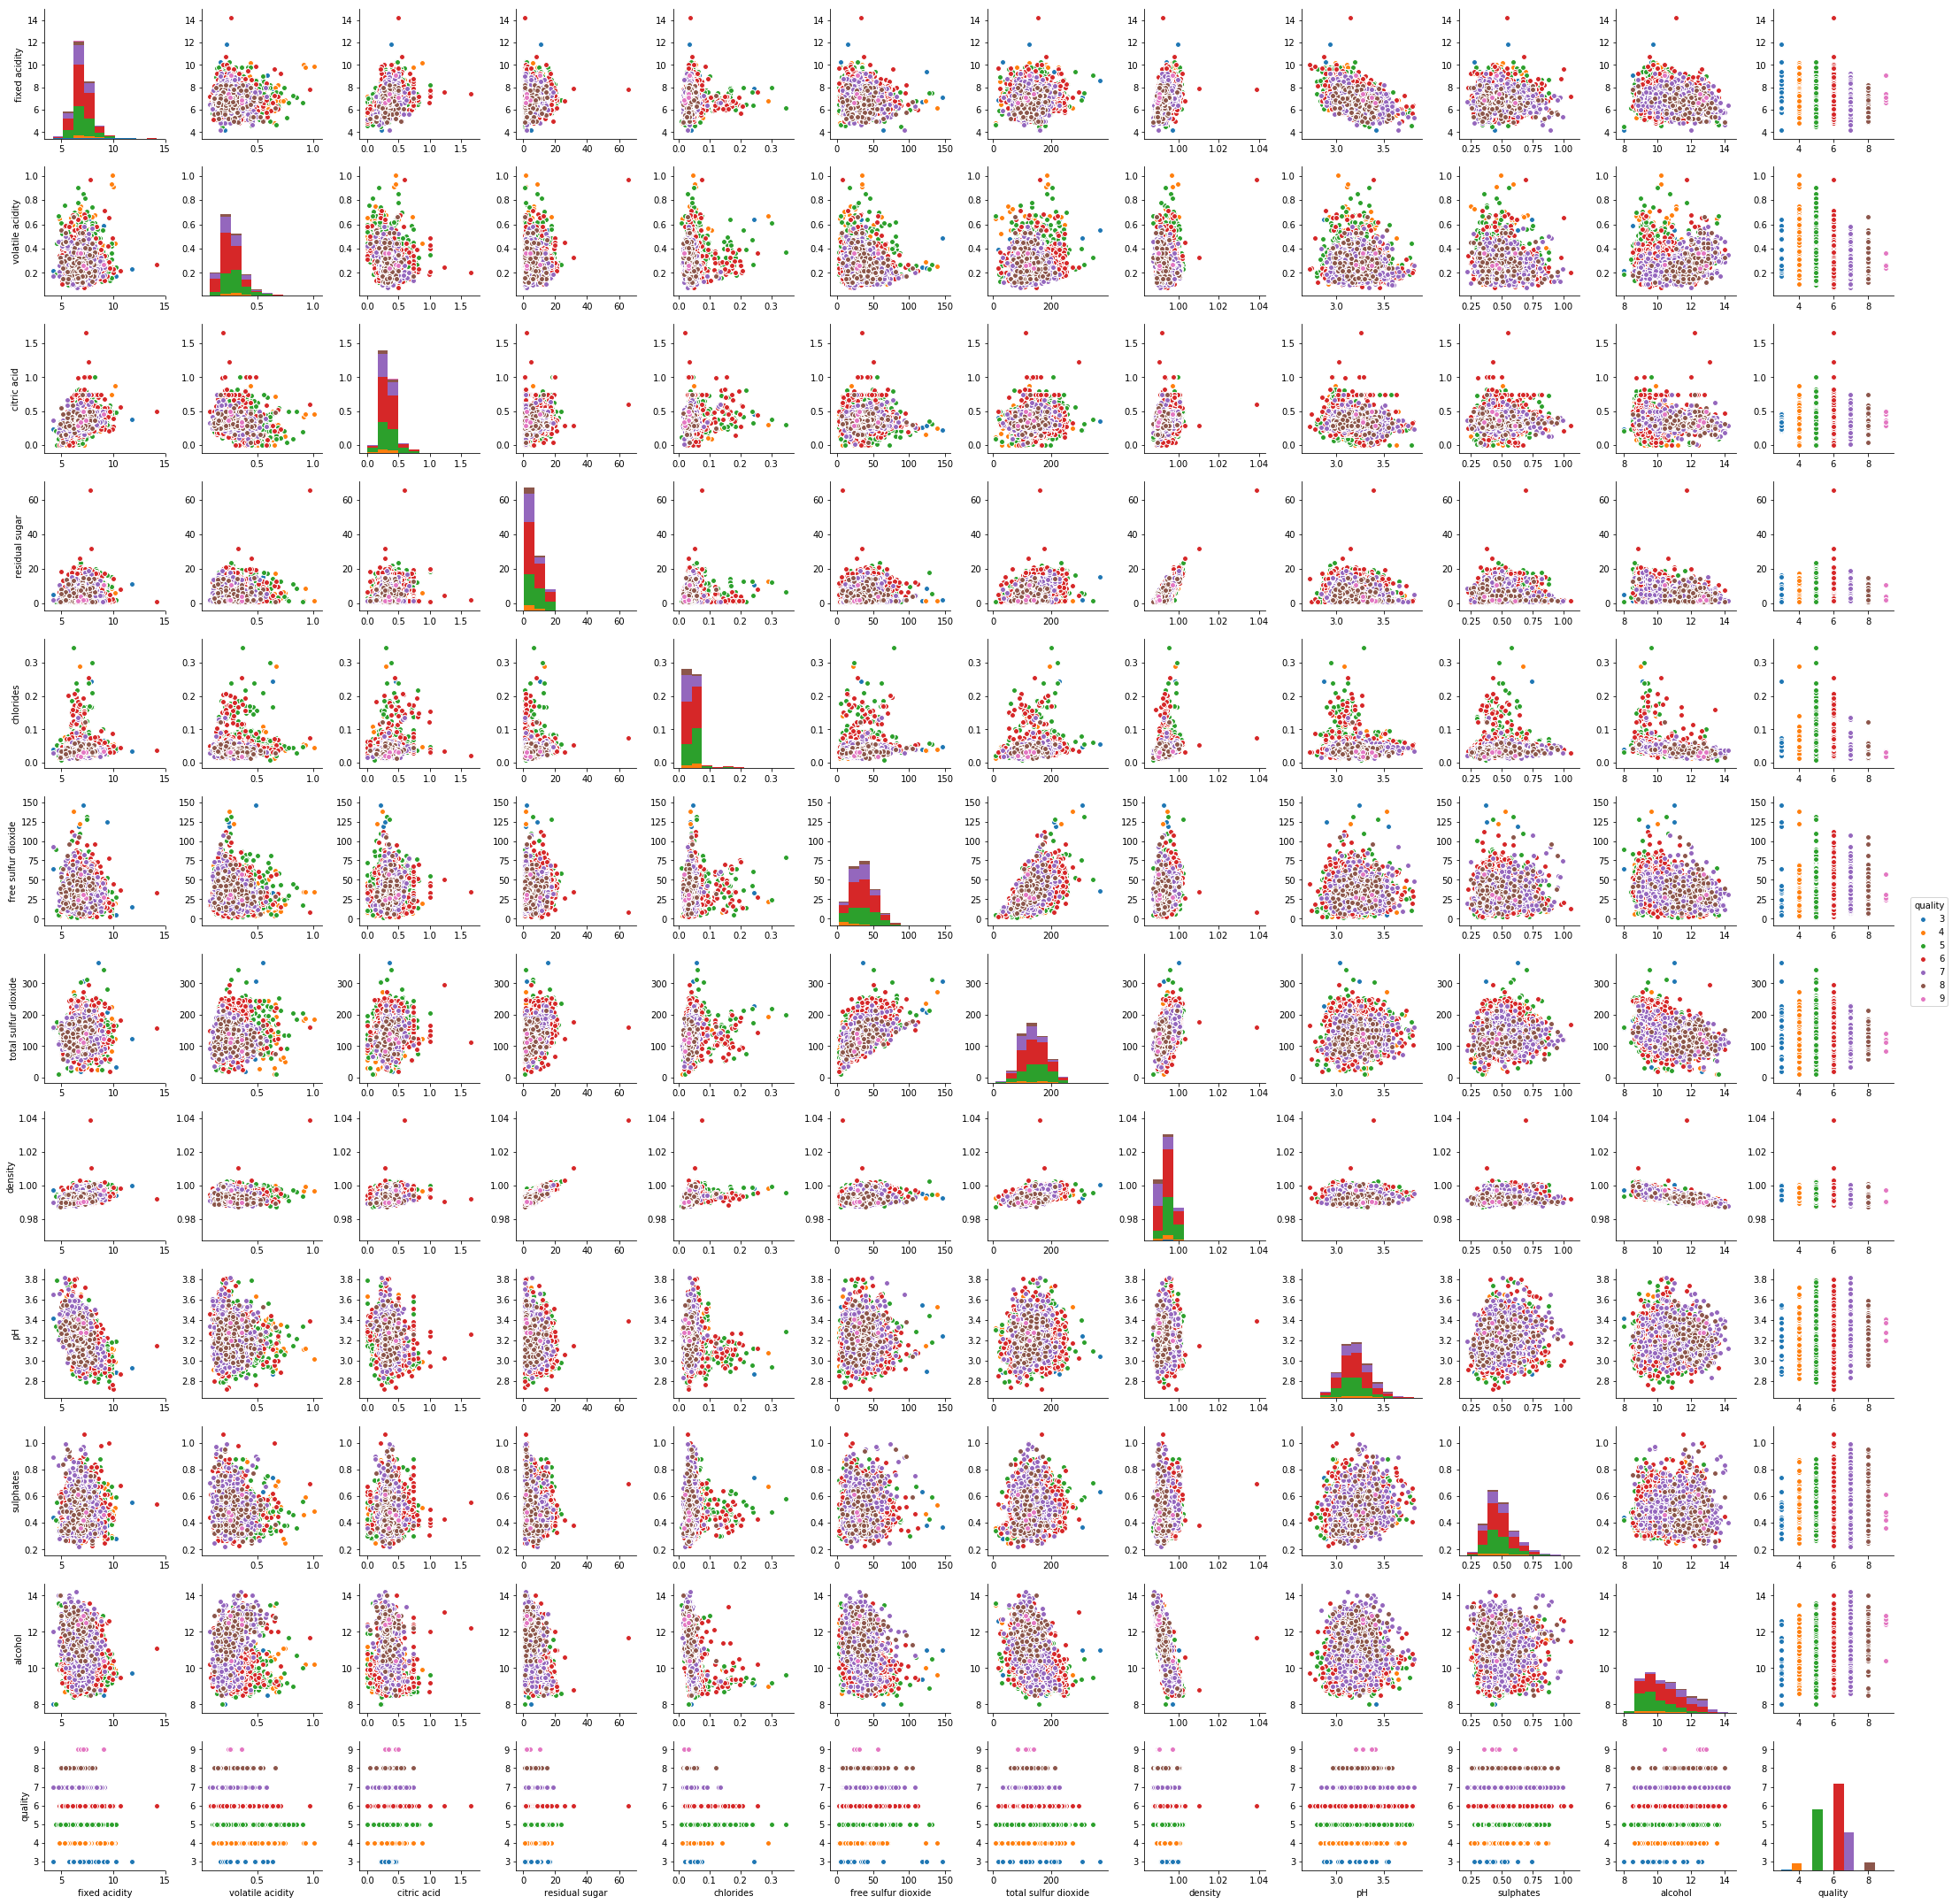

In [7]:
sns.pairplot(train_data,hue="quality",size=2.5)

In [8]:
train_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.957491,0.275835,0.341023,6.364345,0.045627,35.579290,140.498874,0.994188,3.192059,0.488992,10.461206,5.879690
std,0.844744,0.100206,0.122533,5.092889,0.021965,16.913046,43.272642,0.002993,0.152881,0.114198,1.215867,0.910167
min,4.200000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.210000,0.270000,1.700000,0.036000,24.000000,109.000000,0.991880,3.090000,0.410000,9.400000,5.000000
50%,6.900000,0.260000,0.320000,5.175000,0.043000,34.000000,137.000000,0.993900,3.180000,0.470000,10.300000,6.000000
75%,7.400000,0.320000,0.400000,9.800000,0.050000,46.000000,170.000000,0.996272,3.290000,0.550000,11.300000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.200000,9.000000


In [9]:
X_train=train_data.drop(["quality"],axis=1).values
y_train=train_data["quality"].values

In [10]:
X_test=test_data.drop(["quality"],axis=1).values
y_test=test_data["quality"].values

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [12]:
%%time
CV=5
scores=[]
rfc_regressor=RandomForestRegressor(n_estimators=500,max_depth=11,min_samples_split=10,
                                    min_samples_leaf=5,max_features="log2",random_state=3)
scores=cross_val_score(rfc_regressor,X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print (scores.mean())

-0.577821838835
Wall time: 24.8 s


In [13]:
lasso_regressor=Lasso(alpha=0.000001,normalize=True,random_state=3)
scores=cross_val_score(lasso_regressor,X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.599516905954


In [14]:
ridge_regressor=Ridge(alpha=0.000001,fit_intercept=True,normalize=True,random_state=3)
scores=cross_val_score(ridge_regressor,X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.599510887986


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
scaler.fit(X_train)
Scaled_X_train=scaler.transform(X_train)
Scaled_X_test=scaler.transform(X_test)

In [17]:
CV=5
scores=[]
rfc_regressor=RandomForestRegressor(n_estimators=500,max_depth=11,min_samples_split=10,
                                    min_samples_leaf=5,max_features="log2",random_state=3)
scores=cross_val_score(rfc_regressor,Scaled_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print (scores.mean())

-0.57767431379


In [18]:
lasso_regressor=Lasso(alpha=0.000001,normalize=True,random_state=3)
scores=cross_val_score(lasso_regressor,Scaled_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.599516905954


In [19]:
ridge_regressor=Ridge(alpha=0.000001,fit_intercept=True,normalize=True,random_state=3)
scores=cross_val_score(ridge_regressor,Scaled_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.599510887986


In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn_regressor=KNeighborsRegressor(n_neighbors=30)
scores=cross_val_score(knn_regressor,X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.684589184397


In [22]:
knn_regressor=KNeighborsRegressor(n_neighbors=30)
scores=cross_val_score(knn_regressor,Scaled_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.590259470171


In [23]:
import xgboost as xgb

C:\Users\dim\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
%%time
xgb_regressor=xgb.XGBRegressor(gamma=0.35,max_depth=3,min_child_weight=5,subsample=0.7,colsample_bytree=0.8,
                              reg_alpha=0.1,n_estimators=88)
scores=cross_val_score(xgb_regressor,Scaled_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.577153180744
Wall time: 1.38 s


In [25]:
log_X_train=np.log1p(X_train)
log_X_test=np.log1p(X_test)

In [26]:
xgb_regressor=xgb.XGBRegressor(gamma=0.35,max_depth=3,min_child_weight=5,subsample=0.7,colsample_bytree=0.8,
                              reg_alpha=0.1,n_estimators=88)
scores=cross_val_score(xgb_regressor,log_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.577718792612


In [27]:
knn_regressor=KNeighborsRegressor(n_neighbors=30)
scores=cross_val_score(knn_regressor,log_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.637248685857


In [28]:
ridge_regressor=Ridge(alpha=0.000001,fit_intercept=True,normalize=True,random_state=3)
scores=cross_val_score(ridge_regressor,log_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.597095399534


In [29]:
CV=5
scores=[]
rfc_regressor=RandomForestRegressor(n_estimators=500,max_depth=11,min_samples_split=10,
                                    min_samples_leaf=5,max_features="log2",random_state=3)
scores=cross_val_score(rfc_regressor,log_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print (scores.mean())

-0.577701414209


In [30]:
lasso_regressor=Lasso(alpha=0.000001,normalize=True,random_state=3)
scores=cross_val_score(lasso_regressor,log_X_train,y_train,scoring="neg_mean_absolute_error",cv=CV)
print(scores.mean())

-0.597097849693


In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
xgb_regressor=xgb.XGBRegressor(gamma=0.35,max_depth=3,min_child_weight=5,subsample=0.7,colsample_bytree=0.8,
                              reg_alpha=0.1,n_estimators=88)
xgb_regressor.fit(Scaled_X_train,y_train)
predicted=xgb_regressor.predict(Scaled_X_test)

In [33]:
score=mean_absolute_error(predicted,y_test)
print(score)

0.513454741372


In [34]:
pred_int=np.rint(predicted)

In [35]:
score=mean_absolute_error(pred_int,y_test)
print(score)

0.465555555556


In [36]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [37]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train-=mean
X_train/=std
X_test-=mean
X_test/=std

In [130]:
model=Sequential()
model.add(Dense(12,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [131]:
model.fit(X_train,y_train,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
 - 12s - loss: 3.5827 - mean_absolute_error: 1.3613
Epoch 2/100
 - 11s - loss: 0.7472 - mean_absolute_error: 0.6721
Epoch 3/100
 - 11s - loss: 0.6095 - mean_absolute_error: 0.6056
Epoch 4/100
 - 11s - loss: 0.5859 - mean_absolute_error: 0.5921
Epoch 5/100
 - 11s - loss: 0.5730 - mean_absolute_error: 0.5910
Epoch 6/100
 - 11s - loss: 0.5579 - mean_absolute_error: 0.5823
Epoch 7/100
 - 11s - loss: 0.5552 - mean_absolute_error: 0.5807
Epoch 8/100
 - 11s - loss: 0.5503 - mean_absolute_error: 0.5822
Epoch 9/100
 - 11s - loss: 0.5515 - mean_absolute_error: 0.5827
Epoch 10/100
 - 11s - loss: 0.5484 - mean_absolute_error: 0.5794
Epoch 11/100
 - 12s - loss: 0.5411 - mean_absolute_error: 0.5747
Epoch 12/100
 - 11s - loss: 0.5407 - mean_absolute_error: 0.5735
Epoch 13/100
 - 11s - loss: 0.5477 - mean_absolute_error: 0.5798
Epoch 14/100
 - 11s - loss: 0.5387 - mean_absolute_error: 0.5748
Epoch 15/100
 - 11s - loss: 0.5359 - mean_absolute_error: 0.5722
Epoch 16/100
 - 11s - loss: 0.5378

In [132]:
mse,mae=model.evaluate(X_test,y_test,verbose=0)

In [133]:
print(mae)

0.526609476407


In [134]:
pred=model.predict(X_test)

In [135]:
score=mean_absolute_error(pred,y_test)
print(score)

0.526609479586


In [136]:
pred_int=np.rint(pred)

In [137]:
score=mean_absolute_error(pred_int,y_test)
print(score)

0.492222222222


In [138]:
pred_int

array([[ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 7.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 5.],
       [ 7.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 6.],
       [ 6.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 5.],
       [ 6.],
      